In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

# excel file to read the accelerometer data from 
file_name = 'C:/Users/lenovo/Karishma/Study/Quarter4/EmbeddedUbiComp/Assignment6/Maharshi_assignment6.xlsx'

# Read only the X, Y and Z columns for each of 5 activities. 
# Here the array index indicates the kind of activity(0-4).
data = []
for i in range(0, 4):
    temp = pd.read_excel(file_name, parse_cols=[4*i+1,4*i+2,4*i+3])
    data.append(temp)

print("Total Training data rows:", data[0].shape[0])

Total Training data rows: 22055


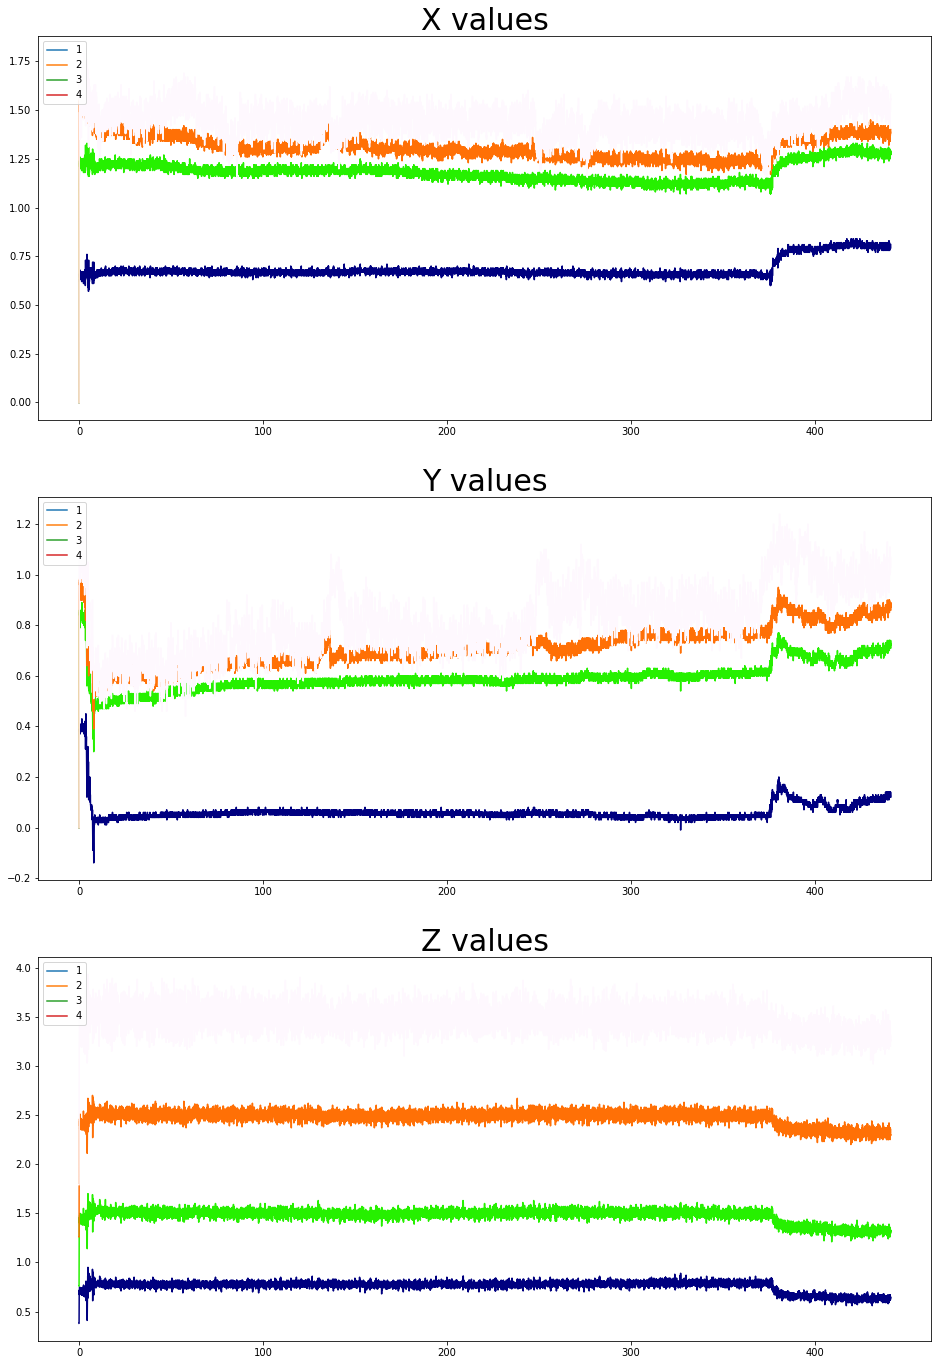

In [114]:
# plot the data to figure out the features that can help properly classify the data

import matplotlib.pyplot as plt

# read the time stamp from the excel file
x = pd.read_excel(file_name, sheet_name=0, parse_cols=[0])

plot_x = np.row_stack((data[0]['X'], data[1]['X'], data[2]['X'], data[3]['X'])) 
plot_y = np.row_stack((data[0]['Y'], data[1]['Y'], data[2]['Y'], data[3]['Y']))
plot_z = np.row_stack((data[0]['Z'], data[1]['Z'], data[2]['Z'], data[3]['Z']))

x_stack = np.cumsum(plot_x, axis=0)  
y_stack = np.cumsum(plot_y, axis=0)
z_stack = np.cumsum(plot_z, axis=0)

fig = plt.figure(figsize=(16,24))

# plot X values for every activity
ax1 = fig.add_subplot(311)
ax1.plot(x, x_stack[0,:], label=1)
ax1.plot(x, x_stack[1,:], label=2)
ax1.plot(x, x_stack[2,:], label=3)
ax1.plot(x, x_stack[3,:], label=4)
ax1.legend(loc=2)
ax1.set_title('X values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])


# # plot Y values for every activity
ax2 = fig.add_subplot(312)
ax2.plot(x, y_stack[0,:], label=1)
ax2.plot(x, y_stack[1,:], label=2)
ax2.plot(x, y_stack[2,:], label=3)
ax2.plot(x, y_stack[3,:], label=4)
ax2.legend(loc=2)
ax2.set_title('Y values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])

    
# plot Z values for every activity
ax3 = fig.add_subplot(313)
ax3.plot(x, z_stack[0,:], label=1)
ax3.plot(x, z_stack[1,:], label=2)
ax3.plot(x, z_stack[2,:], label=3)
ax3.plot(x, z_stack[3,:], label=4)

ax3.legend(loc=2)
ax3.set_title('Z values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax3.lines))]
for i,j in enumerate(ax3.lines):
    j.set_color(colors[i])

# plt.savefig('smooth_plot.png')

In [115]:
# window size i.e. number of points to consider while extracting features
points = 300

X_train = []
Y_train = []

# calculate features like mean and std across all activites along a particular window size
for i in range(0, 4):
    
    for j in range(0, data[i].shape[0]//points):
        
#         calculate the mean and standard deviation for a window of points value
        mean_x = np.mean(data[i]['X'][j*points:j*points+points])
        mean_y = np.mean(data[i]['Y'][j*points:j*points+points])
        mean_z = np.mean(data[i]['Z'][j*points:j*points+points])
        
        std_x = np.std(data[i]['X'][j*points:j*points+points])
        std_y = np.std(data[i]['Y'][j*points:j*points+points])
        std_z = np.std(data[i]['Z'][j*points:j*points+points])

        median_x = np.median(data[i]['X'][j*points:j*points+points])
        median_y = np.median(data[i]['Y'][j*points:j*points+points])
        median_z = np.median(data[i]['Z'][j*points:j*points+points])
        
        X_train.append((mean_x, mean_y, mean_z, std_x, std_y, std_z, median_x, median_y, median_z))
        Y_train.append(i+1)

In [118]:
print ("No. of training data rows after extracting features:", data[0].shape[0]//points)

No. of training data rows after extracting features: 73


## Using all extracted features for training

In [120]:
from sklearn import svm
from sklearn import metrics


clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Test data is the 5 min readings taken for sitting again

In [121]:
sitting_dataset = pd.read_csv('C:/Users/lenovo/Karishma/Study/Quarter4/EmbeddedUbiComp/Assignment6/sitting_data_Maharshi.csv')

# window size i.e. number of points to consider while extracting features
points = 300

X_test = []
Y_test = []
# print(len(sitting_dataset))
# print(sitting_dataset)
# calculate features like mean and std across all activites along a particular window size
    
for j in range(0, sitting_dataset.shape[0]//points):

#         calculate the mean and standard deviation for a window of points value
    mean_x = np.mean(sitting_dataset['X'][j*points:j*points+points])
    mean_y = np.mean(sitting_dataset['Y'][j*points:j*points+points])
    mean_z = np.mean(sitting_dataset['Z'][j*points:j*points+points])

    std_x = np.std(sitting_dataset['X'][j*points:j*points+points])
    std_y = np.std(sitting_dataset['Y'][j*points:j*points+points])
    std_z = np.std(sitting_dataset['Z'][j*points:j*points+points])

    median_x = np.median(sitting_dataset['X'][j*points:j*points+points])
    median_y = np.median(sitting_dataset['Y'][j*points:j*points+points])
    median_z = np.median(sitting_dataset['Z'][j*points:j*points+points])
#     print (mean_x, mean_y, mean_z, std_x, std_y, std_z, median_x, median_y, median_z)
    X_test.append((mean_x, mean_y, mean_z, std_x, std_y, std_z, median_x, median_y, median_z))
#     print(len(X_test))
#     Y_train.append(i+1)
Y_hat = clf.predict(X_test)


In [122]:
print(Y_hat)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Error Rate

In [123]:
count = 0
for val in Y_hat:
    if val != 2:
        count = count + 1
print("Error Rate:", count/len(Y_hat))

Error Rate: 0.0
